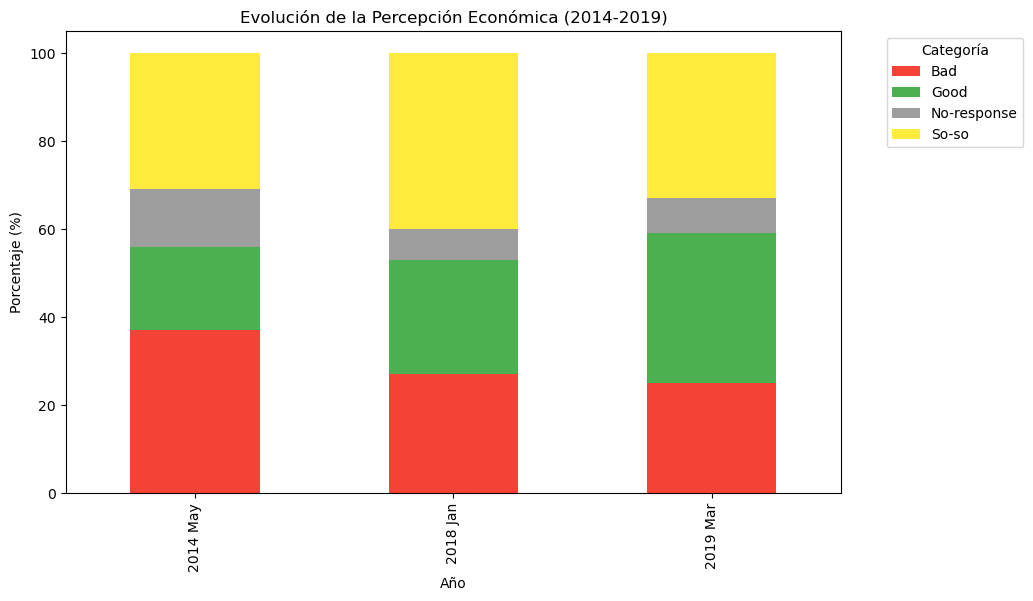

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Año": ["2014 May", "2018 Jan", "2019 Mar"] * 4,
    "Categoría": ["Good"]*3 + ["So-so"]*3 + ["Bad"]*3 + ["No-response"]*3,
    "Porcentaje": [19, 26, 34, 31, 40, 33, 37, 27, 25, 13, 7, 8]
}

df = pd.DataFrame(data)
pivot_df = df.pivot(index="Año", columns="Categoría", values="Porcentaje")

colors = {"Good": "#4CAF50", "So-so": "#FFEB3B", "Bad": "#F44336", "No-response": "#9E9E9E"}
pivot_df.plot(kind="bar", stacked=True, color=[colors[col] for col in pivot_df.columns], figsize=(10, 6))

plt.title("Evolución de la Percepción Económica (2014-2019)")
plt.xlabel("Año")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1))
plt.show()

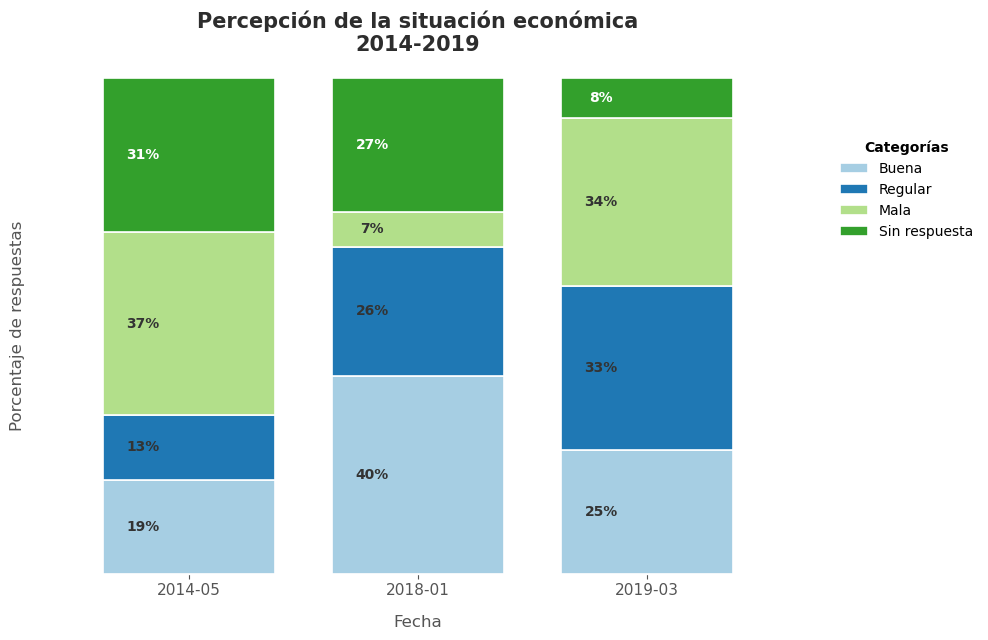

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import rgb_to_hsv, to_rgb
import matplotlib.patheffects as path_effects

# ========== CONFIGURACIÓN DE ESTILO ========== #
plt.style.use('ggplot')  # Still using ggplot as a base
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.labelpad': 12,
    # 'grid.color': '#f0f0f0',  # Removing grid color setting
    'axes.spines.top': False,
    'axes.spines.right': False
})

# ========== DATOS Y COLORES ========== #
categories = ["Buena", "Regular", "Mala", "Sin respuesta"]
colors = sns.color_palette("Paired", n_colors=len(categories))  
data = {
    "Fecha": ["2014-05", "2018-01", "2019-03"] * 4,
    "Categoría": categories * 3,
    "Porcentaje": [19, 26, 34, 31, 40, 33, 37, 27, 25, 13, 7, 8]
}
df = pd.DataFrame(data)
df_pivot = df.pivot(index="Fecha", columns="Categoría", values="Porcentaje")

# ========== FUNCIÓN DE CONTRASTE ========== #
def get_text_color(hex_color):
    """ Determina si usar texto blanco o negro según el color de fondo """
    rgb = to_rgb(hex_color)
    hsv = rgb_to_hsv(rgb)
    return '#333333' if hsv[2] < 0.7 else '#333333'  

# ========== GRÁFICO ========== #
fig, ax = plt.subplots(figsize=(10, 6.5))

# Set background color to white
fig.patch.set_facecolor('white')  
ax.set_facecolor('white')

# Remove gridlines
ax.grid(False) 

# Dibujar barras apiladas
bars = df_pivot[categories].plot.bar(
    stacked=True, color=colors, ax=ax, width=0.75, edgecolor='white', linewidth=1.2
)

# ========== ETIQUETAS CENTRADAS ========== #
for fecha_idx, fecha in enumerate(df_pivot.index):
    bottom = 0
    for cat_idx, categoria in enumerate(categories):
        valor = df_pivot.loc[fecha, categoria]        
        if valor < 5:  # Omitir etiquetas pequeñas
            bottom += valor
            continue        
        x = fecha_idx - 0.4 / 2  # Ajuste preciso de posición X
        y = bottom + valor / 2
        # Resaltar "Sin respuesta" con color blanco o negro:
        text_color = "white" if categoria == "Sin respuesta" else get_text_color(colors[cat_idx])            
        ax.text(
            x, y, f'{valor:.0f}%', ha='center', va='center',
            color=text_color, fontsize=10, fontweight='bold'
        )        
        bottom += valor

# ========== AJUSTES FINALES ========== #
ax.set_xticks(range(len(df_pivot)))
ax.set_xticklabels(df_pivot.index, rotation=0, fontsize=11, ha='center') 
ax.set_ylim(0, 100)
ax.set_ylabel("Porcentaje de respuestas", fontsize=12, labelpad=15)
ax.set_yticks([])  

ax.set_title("Percepción de la situación económica\n2014-2019", 
             fontsize=15, pad=20, weight='bold', color='#2d2d2d')

legend = ax.legend(
    title="Categorías", bbox_to_anchor=(1.05, 0.9),
    frameon=True, edgecolor='white', title_fontproperties={'weight': 'bold'}
)
legend.get_frame().set_facecolor('#ffffff')

plt.tight_layout()
plt.savefig('percepcion_economica_final.png', dpi=300, bbox_inches='tight')
plt.show()